In [ ]:
### LIBRERÍAS AH UTILIZAR
import multiprocessing

cpu_count = multiprocessing.cpu_count()
print(cpu_count)


2


In [ ]:
pip install varclushi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
#import os

#path_proyecto = "/content/drive/MyDrive/PRACTICAS DIRIGIDAS/2025-1/pd08_metodos_complementarios"
#os.chdir(path_proyecto)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
import scipy.cluster.hierarchy as spc
from varclushi import VarClusHi
import shap
import time
from skopt.space import Categorical

from skopt import BayesSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


from catboost import CatBoostClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score




from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score, precision_score, recall_score, roc_curve

PROCESAMIENTO DE LOS DATOS

In [ ]:
ruta = 'https://raw.githubusercontent.com/Josueed054/EF_Programaci-n/refs/heads/main/bd_loans_assessment.csv'
df = pd.read_csv(ruta, sep=',')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
### Explorando datos faltantes
df.isnull().sum() ### No hay datos faltantes en nuestra Variable objetivo, se tratará dependiendo del tipo de dato que se tenga, mediana o moda.

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,7
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,25
Loan_Amount_Term,14


In [ ]:
df.dtypes ### Visualizando los tipos de datos

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
print(f'Se tiene la siguiente dimensión antes del tratamiento de los valores faltantes: {df.shape}')

Se tiene la siguiente dimensión antes del tratamiento de los valores faltantes: (614, 13)


**TRATAMIENTO DE VALORES PERDIDOS**

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,7
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,25
Loan_Amount_Term,14


**Comentario:** Se observa que hay valores perdidos en muchas de las variables candidatas, como el tamaño de la muestra es reducida se imputarán valores según los datos disponibles, dependiendo del tipo de variable que sea.

In [ ]:
### Tratamiento de las variables cualitativas a la moda

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0]) ### Dependents tiene una categorái de 3 a más lo que lo convierte más en una variabe categórica que numérica
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

### Tratamiento de las variables continuas a la mediana

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())


In [ ]:
print(df.isnull().sum())
print(f'Las dimensiones de la base de datos se sigue manteniendo sin perder valores: {df.shape}') ### Sin valores perdidos

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Las dimensiones de la base de datos se sigue manteniendo sin perder valores: (614, 13)


**EXPLORACIÓN DE DATOS SOBRE OUTLIERS**

In [ ]:
cotas = df.describe(percentiles=[.01,.05,.95,.99]).T
cotas.reset_index(inplace=True)
cotas.rename(columns={"index":"variable"},inplace=True)

cotas ### Las variables que no aparecen son lass  categóricas y no son necesearias observar su distribución pues son valores discretos de 2 o 3 valores máximo

,variable,count,mean,std,min,1%,5%,50%,95%,99%,max
0,ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.00,1897.55,3812.5,14583.0,32540.41,81000.0
1,CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,0.00,1188.5,4997.4,8895.89,41667.0
2,LoanAmount,614.0,145.656352,84.069249,9.0,30.65,57.30,128.0,293.4,495.87,700.0
3,Loan_Amount_Term,614.0,342.410423,64.428629,12.0,84.00,180.00,360.0,360.0,480.00,480.0
4,Credit_History,614.0,0.855049,0.352339,0.0,0.00,0.00,1.0,1.0,1.00,1.0


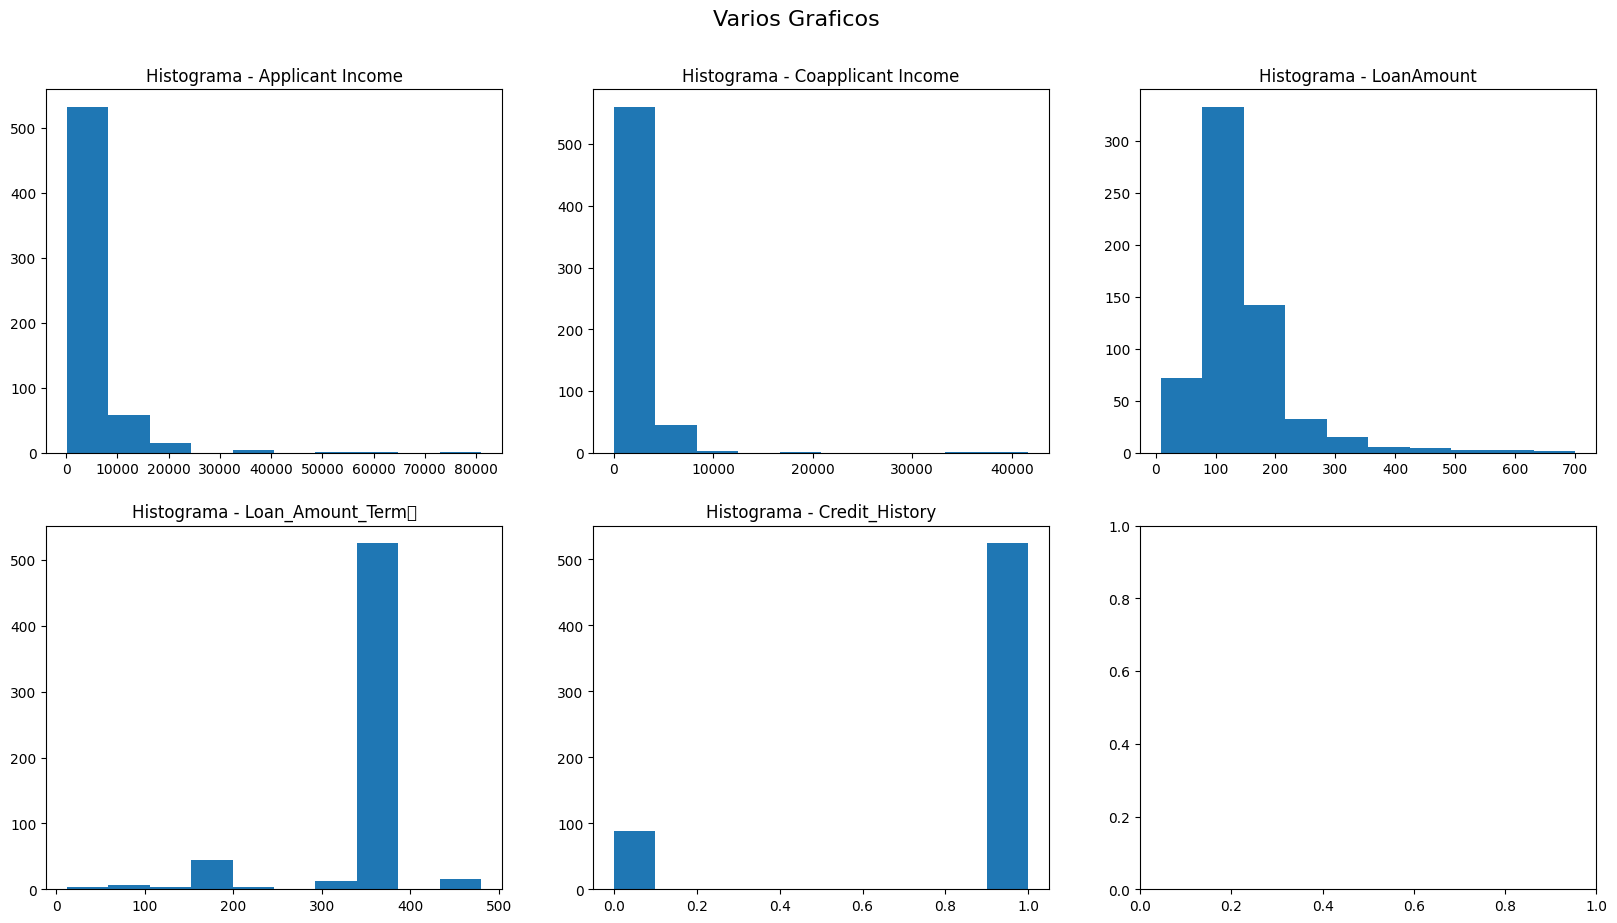

In [ ]:
### Exploración sobre variables continuas

### Realizando los gráficos de exploración
# Subplots de las variables
plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

#Bloque 0,0
axs[0, 0].set_title("Histograma - Applicant Income")
axs[0, 0].hist(x = df["ApplicantIncome"],bins=10) ###          SE OBSERVA PROBLEMA DE OUTLIERS

#Bloque 0,1
axs[0, 1].set_title("Histograma - Coapplicant Income")
axs[0, 1].hist(x = df["CoapplicantIncome"],bins=10) ###        SE OBSERVA PROBLEMA DE OUTLIERS

#Bloque 0,2
axs[0, 2].set_title("Histograma - LoanAmount")
axs[0, 2].hist(x = df["LoanAmount"],bins=10)

#Bloque 1,0
axs[1, 0].set_title("Histograma - Loan_Amount_Term	")   ### Están lso valores en días tal vez se puede convertir en una categórica por  la poca dispersión
axs[1, 0].hist(x = df["Loan_Amount_Term"],bins=10)

#Bloque 1,1
axs[1, 1].set_title("Histograma - Credit_History")
axs[1, 1].hist(x = df["Credit_History"],bins=10)

# #Bloque 1,2
# axs[1, 2].set_title("Histograma - Dependents")
# axs[1, 2].hist(x = df["Gender"],bins=10)

#Titulo Superior del grafico principal
fig.suptitle('Varios Graficos', fontsize=16)
plt.show()

In [ ]:
df['LoanAmount']

,LoanAmount
0,128.0
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


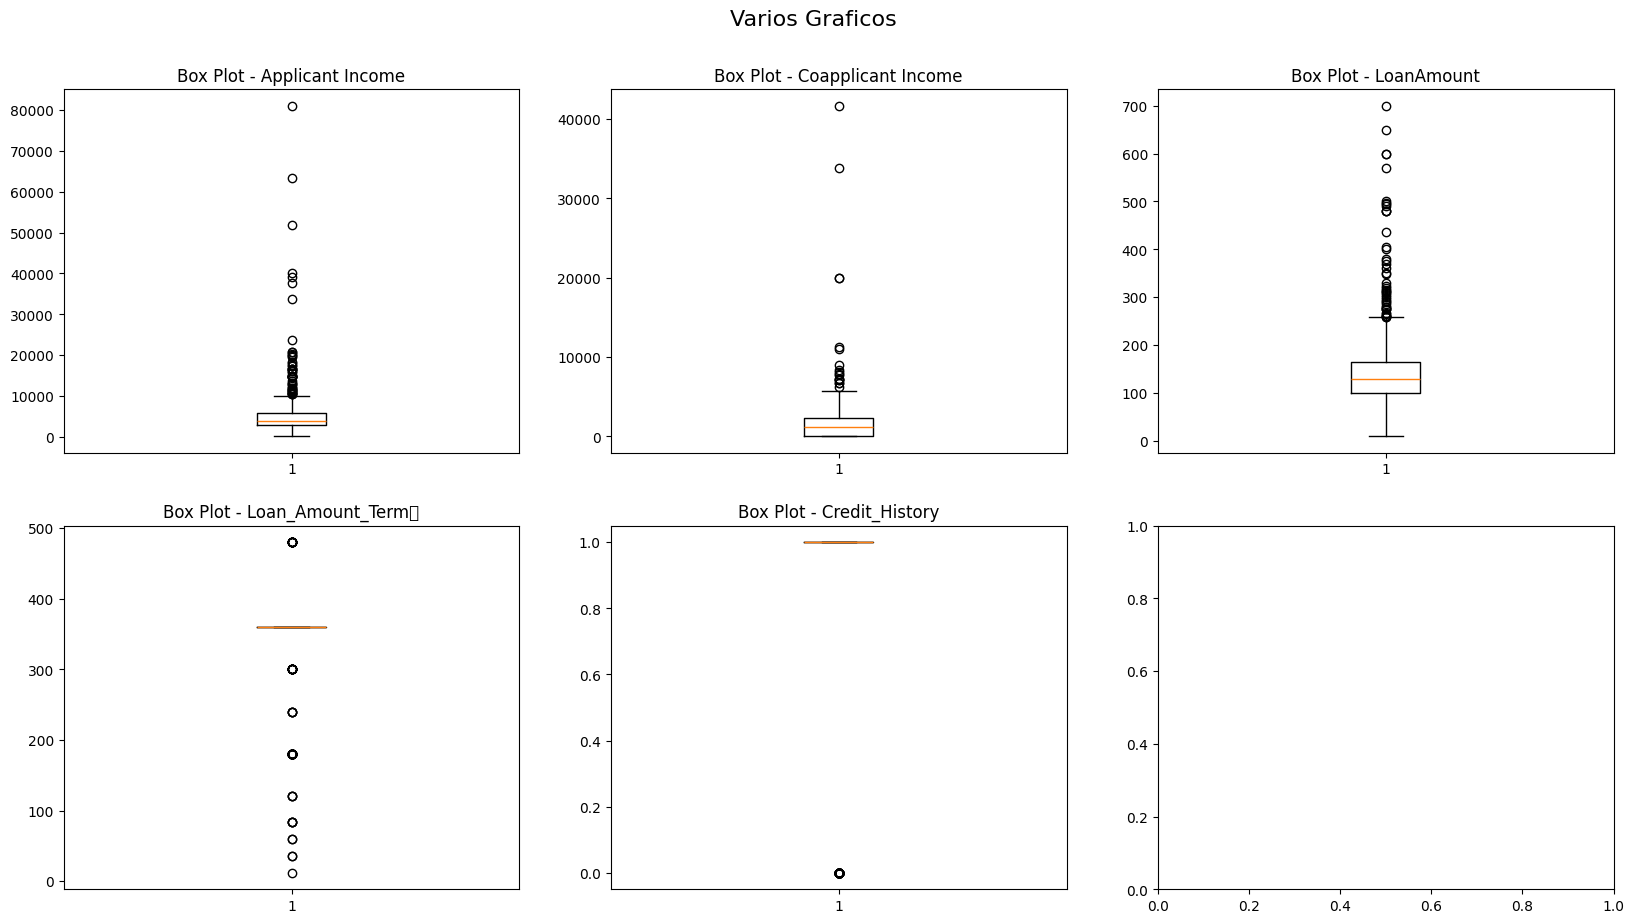

In [ ]:
### Exploración sobre variables continuas

### Realizando los gráficos de exploración
# Subplots de las variables
plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

#Bloque 0,0
axs[0, 0].set_title("Box Plot - Applicant Income")
axs[0, 0].boxplot(x = df["ApplicantIncome"]) ###          SE OBSERVA PROBLEMA DE OUTLIERS

#Bloque 0,1
axs[0, 1].set_title("Box Plot - Coapplicant Income")
axs[0, 1].boxplot(x = df["CoapplicantIncome"]) ###        SE OBSERVA PROBLEMA DE OUTLIERS

#Bloque 0,2
axs[0, 2].set_title("Box Plot - LoanAmount")
axs[0, 2].boxplot( x = df['LoanAmount'])

#Bloque 1,0
axs[1, 0].set_title("Box Plot - Loan_Amount_Term	")   ### Están lso valores en días tal vez se puede convertir en una categórica por  la poca dispersión
axs[1, 0].boxplot(x = df["Loan_Amount_Term"])

#Bloque 1,1
axs[1, 1].set_title("Box Plot - Credit_History")
axs[1, 1].boxplot(x = df["Credit_History"])

# #Bloque 1,2
# axs[1, 2].set_title("Histograma - Dependents")
# axs[1, 2].hist(x = df["Gender"],bins=10)

#Titulo Superior del grafico principal
fig.suptitle('Varios Graficos', fontsize=16)
plt.show()

**CONTEO DE OUTLIERS:** Se observa que las variables Applicant Income, Coapplicant Income  y Loan Amount  tiene problemas con valores muy extremos que pueden sesgar la muestra. Además se observa que variables como Loan_Amount_Term tiene poca varianza, tal vez se pueda modificar esta variable

In [ ]:
cotas.head()

,variable,count,mean,std,min,1%,5%,50%,95%,99%,max
0,ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.00,1897.55,3812.5,14583.0,32540.41,81000.0
1,CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,0.00,1188.5,4997.4,8895.89,41667.0
2,LoanAmount,614.0,145.656352,84.069249,9.0,30.65,57.30,128.0,293.4,495.87,700.0
3,Loan_Amount_Term,614.0,342.410423,64.428629,12.0,84.00,180.00,360.0,360.0,480.00,480.0
4,Credit_History,614.0,0.855049,0.352339,0.0,0.00,0.00,1.0,1.0,1.00,1.0


In [ ]:
### Tratamiento reduciendolo a sus cotas de 99%
def acotar_valores(x, inf, sup):
    if (x < inf):
        return inf
    elif (x>sup):
        return sup
    else:
        return x

for index, variable in enumerate(cotas.variable): ### Iteración para que me entrego los valores de los percentiles de de esos valores
    cotas_Inf = cotas.iloc[index]["1%"]  ### Aquí se especifíca los valores
    cotas_Sup = cotas.iloc[index]["99%"]
    print("{0} --> Limites (Inf,Sup) ({1},{2})".format(variable,cotas_Inf,cotas_Sup))
    df[variable] = df[variable].apply(lambda x: acotar_valores(x,cotas_Inf,cotas_Sup))

ApplicantIncome --> Limites (Inf,Sup) (1025.0,32540.410000000047)
CoapplicantIncome --> Limites (Inf,Sup) (0.0,8895.890000000003)
LoanAmount --> Limites (Inf,Sup) (30.65,495.87)
Loan_Amount_Term --> Limites (Inf,Sup) (84.0,480.0)
Credit_History --> Limites (Inf,Sup) (0.0,1.0)


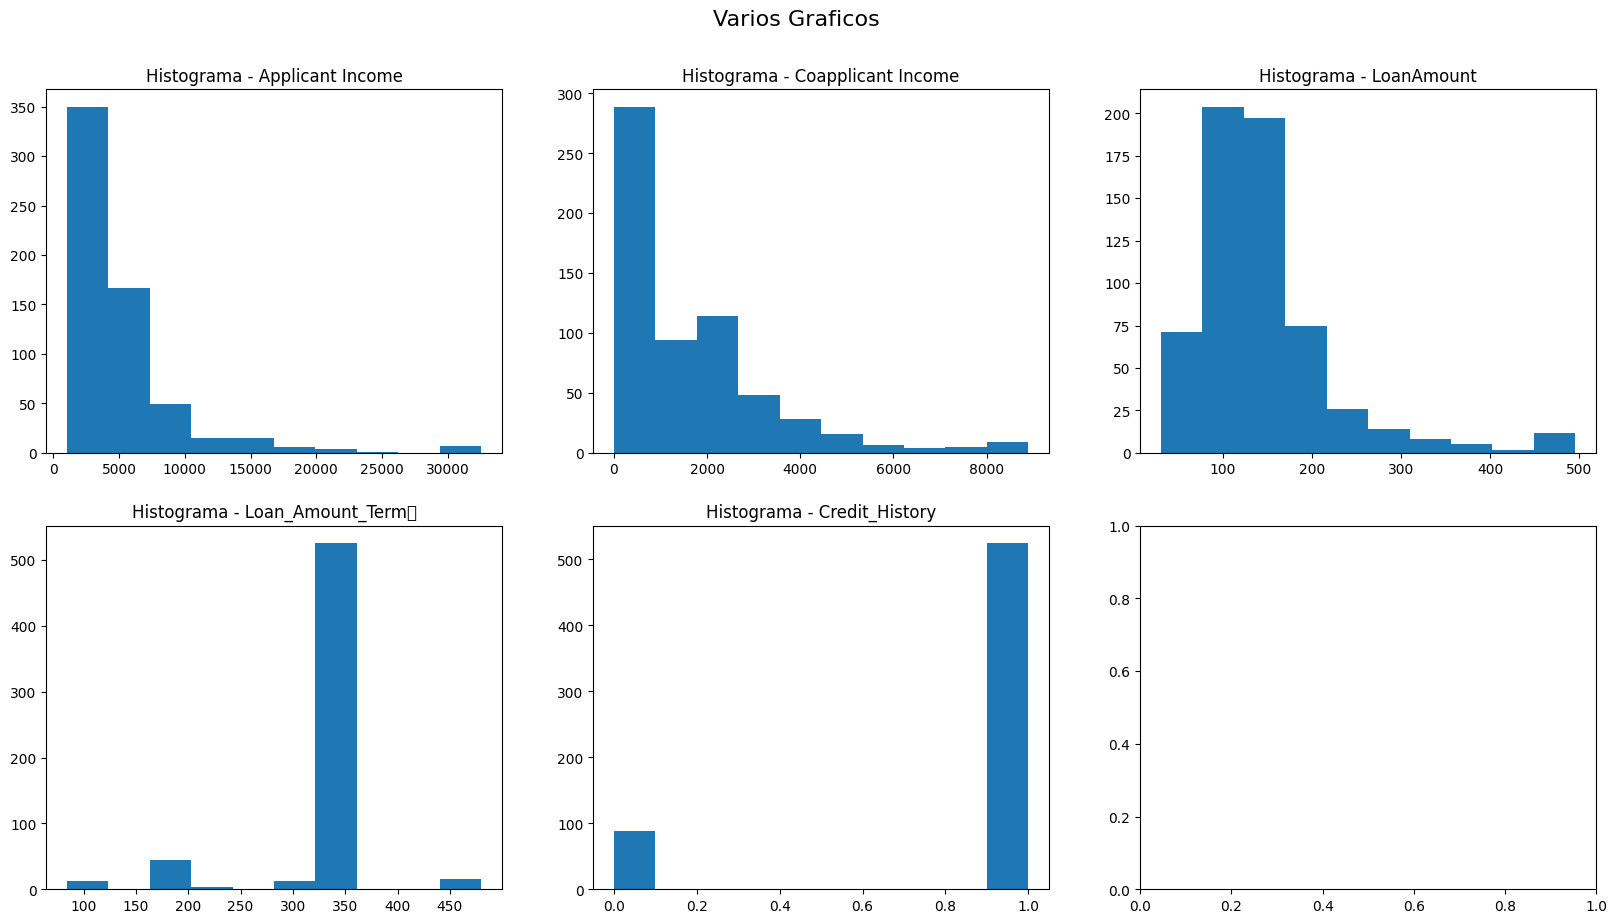

In [ ]:
### Verificando mejor distribución
### Exploración sobre variables continuas

### Realizando los gráficos de exploración
# Subplots de las variables
plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

#Bloque 0,0
axs[0, 0].set_title("Histograma - Applicant Income")
axs[0, 0].hist(x = df["ApplicantIncome"],bins=10) ###          SE OBSERVA PROBLEMA DE OUTLIERS

#Bloque 0,1
axs[0, 1].set_title("Histograma - Coapplicant Income")
axs[0, 1].hist(x = df["CoapplicantIncome"],bins=10) ###        SE OBSERVA PROBLEMA DE OUTLIERS

#Bloque 0,2
axs[0, 2].set_title("Histograma - LoanAmount")
axs[0, 2].hist(x = df["LoanAmount"],bins=10)

#Bloque 1,0
axs[1, 0].set_title("Histograma - Loan_Amount_Term	")   ### Están lso valores en días tal vez se puede convertir en una categórica por  la poca dispersión
axs[1, 0].hist(x = df["Loan_Amount_Term"],bins=10)

#Bloque 1,1
axs[1, 1].set_title("Histograma - Credit_History")
axs[1, 1].hist(x = df["Credit_History"],bins=10)

# #Bloque 1,2
# axs[1, 2].set_title("Histograma - Dependents")
# axs[1, 2].hist(x = df["Gender"],bins=10)

#Titulo Superior del grafico principal
fig.suptitle('Varios Graficos', fontsize=16)
plt.show()

In [ ]:

cotas_nueva = df.describe(percentiles=[.01,.05,.95,.99]).T
cotas.reset_index(inplace=True)
cotas.rename(columns={"index":"variable"},inplace=True)
cotas_nueva

,count,mean,std,min,1%,5%,50%,95%,99%,max
ApplicantIncome,614.0,5214.577964,4528.770082,1025.00,1025.0000,1897.55,3812.5,14583.0,31404.5467,32540.41
CoapplicantIncome,614.0,1483.654967,1831.226927,0.00,0.0000,0.00,1188.5,4997.4,8822.7143,8895.89
LoanAmount,614.0,144.691596,78.471599,30.65,31.2155,57.30,128.0,293.4,495.7569,495.87
Loan_Amount_Term,614.0,342.762215,62.856673,84.00,84.0000,180.00,360.0,360.0,480.0000,480.00
Credit_History,614.0,0.855049,0.352339,0.00,0.0000,0.00,1.0,1.0,1.0000,1.00


# 2. FEATURE ENGINEERING -Creando varaibles como en un laboratorio

In [ ]:
X = df.drop(['Loan_ID','Loan_Status'], axis = 1) ### Generando nuestra matriz X de v.independientes
y = df['Loan_Status'] #### Variable dependiente

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban


In [ ]:
X['Loan_Amount_Term'].astype(int)
X['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,526
180.0,44
480.0,15
300.0,13
84.0,9
240.0,4
120.0,3


In [ ]:
### Convertir la variable Loan_Amount_Term en una variable categórica, ya que tiene poca dispersión.
# for a, b in X.iterrows():
#   loan_term = b['Loan_Amount_Term']
#   if loan_term <= 180:
#      X.loc[a, 'plazo_prestamo'] = 'prestamo_menor_a_6_years'
#   elif loan_term <= 360: ###and loan_term <= 360:
#      X.loc[a, 'plazo_prestamo'] = 'prestamo_entre_6_y_12_years'
#   elif loan_term > 360:
#      X.loc[a, 'plazo_prestamo'] = 'mas_de_12_years'



In [ ]:
### Convertir la variable Loan_Amount_Term en una variable categórica, ya que tiene poca dispersión.
for a, b in X.iterrows():
  loan_term = b['Loan_Amount_Term']
  if loan_term < 360:
    X.loc[a, 'plazo_prestamo'] = 'prestamo_menor_12_years'
  elif loan_term >= 360: ###and loan_term <= 360:
    X.loc[a, 'plazo_prestamo'] = 'prestamo_mayor_12_years'



In [ ]:
x = X['plazo_prestamo']
x.value_counts()


,count
plazo_prestamo,
prestamo_mayor_12_years,541
prestamo_menor_12_years,73


In [ ]:
X['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,plazo_prestamo
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,prestamo_mayor_12_years
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,prestamo_mayor_12_years
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,prestamo_mayor_12_years
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,prestamo_mayor_12_years
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,prestamo_mayor_12_years


In [ ]:
#### Creando una variable Bandera que categoriza que el coaplicante tenga mayor ingreso que el aplicante directoC
X['Cooaplicante_mejor_que_aplicante'] = (X['CoapplicantIncome'] > X['ApplicantIncome']).astype(int) ### 1 si el Coaplicante tiene mayor ingreso
X['Cooaplicante_mejor_que_aplicante'].value_counts()


,count
Cooaplicante_mejor_que_aplicante,
0,542
1,72


In [ ]:
####Creando una variable que considere los ingresos del aplicante y coaplicante, pero considerando un peso reducido en el coaplicante
fact_red = 1
X['Ingreso_total'] = X['ApplicantIncome'] + X['CoapplicantIncome']*fact_red
X['Ingreso_total'] = X['Ingreso_total']/1000  ### Ya que la unidad del prestamo está en miles tmb se aplicará en miles el Ingreso total.
X['Ingreso_total_log'] = np.log1p(X['Ingreso_total'])

###


In [ ]:
### APLICANDO LN sobre LoanAmount para suavizar su distribución
X['LoanAmount_log'] = np.log1p(X['LoanAmount'])

RATIOS

In [ ]:
### Creando un ratio sobre la carga del crédito sobre la persona, aplicando multiplicador de 12 para aproximarlo a un ingreso anual
X['Ratio_carga_credito_total'] = X['LoanAmount']/(X['Ingreso_total'])



X['Ratio_carga_credito_aplicante'] = X['LoanAmount']/X['ApplicantIncome']

In [ ]:
### Creando un ratio pero sobre la cuota
X['cuota_credito_total'] = X['LoanAmount']/X['Loan_Amount_Term']
X['Ratio_cuota_credito_aplicante'] = X['cuota_credito_total']/X['Loan_Amount_Term']

In [ ]:
#### Creando variable sobre el

In [ ]:
### Poca dispersión en estos datos se cinvertirán en categórica
X['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,526
180.0,44
480.0,15
300.0,13
84.0,9
240.0,4
120.0,3


In [ ]:
### Cambiando la variable Dependientes a variable numérica

X['Dependents_numerico'] = X['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})
X['Dependents_numerico'] = X['Dependents_numerico'].astype(int)
X['Dependents_numerico'].value_counts()

,count
Dependents_numerico,
0,360
1,102
2,101
3,51


In [ ]:
### Ahora que se tiene la variable dependientes numérica crearé un ratio que represente el ingreso por dependiente, pues el ingreso es relativo
### a la cantidad a personas que dependen de la persona.
X["Ratio_ingreso_por_dependiente"] = X["Ingreso_total"]/(X["Dependents_numerico"]+1)

INTERACCIONES creo que puedo capturar alguna interaccione entre variables sobre Credit history que puedan hacer que las variables sean más confiables por tener un historial creditio o no.

In [ ]:
### INTERACCIONES ENTRE VARIABLES
### Interaccion entre ingreso del aplicante con su historial de credito, le da un mayor valor al ingreso si tiene historial de credito
X['Interaccion_ingreso_x_credit_hist'] =  X['ApplicantIncome']* X['Credit_History']


### Interaccion




In [ ]:
### Interaccion sobre Loan mount y Credit History
X['Interaccion_montoprestamo_x_credit_hist'] =  X['LoanAmount']* X['Credit_History']

In [ ]:
# OBTENIENDO LAS DUMMYS CORRESPONDIENTES CON VALORES NUMÉRICOS
X = pd.get_dummies(X, drop_first=True, dtype = bool)

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Cooaplicante_mejor_que_aplicante,Ingreso_total,Ingreso_total_log,LoanAmount_log,Ratio_carga_credito_total,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,plazo_prestamo_prestamo_menor_12_years
0,5849.0,0.0,128.0,360.0,1.0,0,5.849,1.924103,4.859812,21.884083,...,True,False,False,False,False,False,False,False,True,False
1,4583.0,1508.0,128.0,360.0,1.0,0,6.091,1.958826,4.859812,21.014612,...,True,True,True,False,False,False,False,False,False,False
2,3000.0,0.0,66.0,360.0,1.0,0,3.000,1.386294,4.204693,22.000000,...,True,True,False,False,False,False,True,False,True,False
3,2583.0,2358.0,120.0,360.0,1.0,0,4.941,1.781877,4.795791,24.286582,...,True,True,False,False,False,True,False,False,True,False
4,6000.0,0.0,141.0,360.0,1.0,0,6.000,1.945910,4.955827,23.500000,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [ ]:
### Convirtiendo las dummys a valores numéricos
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

y = y.map({'Y': 1, 'N': 0})

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Cooaplicante_mejor_que_aplicante,Ingreso_total,Ingreso_total_log,LoanAmount_log,Ratio_carga_credito_total,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,plazo_prestamo_prestamo_menor_12_years
0,5849.0,0.0,128.0,360.0,1.0,0,5.849,1.924103,4.859812,21.884083,...,1,0,0,0,0,0,0,0,1,0
1,4583.0,1508.0,128.0,360.0,1.0,0,6.091,1.958826,4.859812,21.014612,...,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,3.000,1.386294,4.204693,22.000000,...,1,1,0,0,0,0,1,0,1,0
3,2583.0,2358.0,120.0,360.0,1.0,0,4.941,1.781877,4.795791,24.286582,...,1,1,0,0,0,1,0,0,1,0
4,6000.0,0.0,141.0,360.0,1.0,0,6.000,1.945910,4.955827,23.500000,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
print(X.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Cooaplicante_mejor_que_aplicante', 'Ingreso_total',
       'Ingreso_total_log', 'LoanAmount_log', 'Ratio_carga_credito_total',
       'Ratio_carga_credito_aplicante', 'cuota_credito_total',
       'Ratio_cuota_credito_aplicante', 'Dependents_numerico',
       'Ratio_ingreso_por_dependiente', 'Interaccion_ingreso_x_credit_hist',
       'Interaccion_montoprestamo_x_credit_hist', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'plazo_prestamo_prestamo_menor_12_years'],
      dtype='object')


In [ ]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# 3. Sampling y Balanceo de Datos

In [ ]:
y.value_counts(normalize=True)

,proportion
Loan_Status,
1,0.687296
0,0.312704


In [ ]:
y.value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Cooaplicante_mejor_que_aplicante', 'Ingreso_total',
       'Ingreso_total_log', 'LoanAmount_log', 'Ratio_carga_credito_total',
       'Ratio_carga_credito_aplicante', 'cuota_credito_total',
       'Ratio_cuota_credito_aplicante', 'Dependents_numerico',
       'Ratio_ingreso_por_dependiente', 'Interaccion_ingreso_x_credit_hist',
       'Interaccion_montoprestamo_x_credit_hist', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'plazo_prestamo_prestamo_menor_12_years'],
      dtype='object')

Escalado de datos

In [ ]:
### Partición de la muestra en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=60, stratify=y)

### Ahora se realiza el escalamiento - Se decidió utilizar el método de escalado Estándar, para la mayoría de modelos
# Si se requiere otro tipio de escalado en el modelo consultar


### ¡¡¡IMPORTANTE!!!  me di cuenta que aplicar escalado sobre dummys las devuelve en otros rangos, por tanto se deben omitir
### del proceso de escalado
scaler = StandardScaler() ### El escalamiento me las devuelve como un array



variables_numericas = ['ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term',
    'Ingreso_total',
    'Ratio_carga_credito_total',
    'Ratio_carga_credito_aplicante',
    'Ratio_cuota_credito_aplicante',
    'cuota_credito_total',
    'Ratio_ingreso_por_dependiente',
    'Dependents_numerico',
    'Ingreso_total_log',
    'LoanAmount_log',
    'Interaccion_ingreso_x_credit_hist',
    'Interaccion_montoprestamo_x_credit_hist']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[variables_numericas] = scaler.fit_transform(X_train[variables_numericas])
X_test_scaled[variables_numericas] = scaler.transform(X_test[variables_numericas])






### Cuando se escalan los datos se les cambia a tipo Array de objeto asi que se le regresa al tipo DataFrame para manejarlo como siempre
print(type(X_train_scaled))


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(type(X_train_scaled))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train.shape

(491, 27)

In [ ]:
y_train.shape

(491,)

In [ ]:
y_train.value_counts()

,count
Loan_Status,
1,337
0,154


In [ ]:
X_train_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Cooaplicante_mejor_que_aplicante,Ingreso_total,Ingreso_total_log,LoanAmount_log,Ratio_carga_credito_total,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,plazo_prestamo_prestamo_menor_12_years
359,0.014506,0.909821,0.802610,0.292238,1.0,0,0.384961,0.732995,0.982408,0.015963,...,1,1,0,0,1,0,0,1,0,0
273,-0.563440,0.398490,0.115673,0.292238,1.0,0,-0.385798,-0.351231,0.356918,0.885416,...,1,1,0,0,0,0,0,1,0,0
111,-0.493324,0.458073,-0.035453,0.292238,1.0,0,-0.293289,-0.190929,0.191512,0.317363,...,0,1,0,0,0,0,0,1,0,0
274,-0.272992,-0.805629,-0.708651,0.292238,1.0,0,-0.593998,-0.758630,-0.750540,-0.098871,...,1,1,0,1,0,0,0,1,0,0
164,0.957555,-0.805629,-0.914732,-2.506631,1.0,0,0.603317,0.966105,-1.144446,-1.972836,...,1,1,0,0,0,0,0,0,1,1


In [ ]:
X_train_scaled.shape

(491, 27)

In [ ]:
print(X.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Cooaplicante_mejor_que_aplicante', 'Ingreso_total',
       'Ingreso_total_log', 'LoanAmount_log', 'Ratio_carga_credito_total',
       'Ratio_carga_credito_aplicante', 'cuota_credito_total',
       'Ratio_cuota_credito_aplicante', 'Dependents_numerico',
       'Ratio_ingreso_por_dependiente', 'Interaccion_ingreso_x_credit_hist',
       'Interaccion_montoprestamo_x_credit_hist', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'plazo_prestamo_prestamo_menor_12_years'],
      dtype='object')


In [ ]:
### Para obtener la lista de variables categóricas explícitas para el método SMOTENC
columnas_binarias = [col for col in X.columns if X[col].nunique() == 2]  # Identificar las binarias
lista_variables_categoricas = list(columnas_binarias)


variables_categoricas = [X.columns.get_loc(col) for col in lista_variables_categoricas] ### las co




In [ ]:
lista_variables_categoricas

['Credit_History',
 'Cooaplicante_mejor_que_aplicante',
 'Gender_Male',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'plazo_prestamo_prestamo_menor_12_years']

BALANCEO CON SMOTENC

In [ ]:
smote_nc = SMOTENC(categorical_features=variables_categoricas , random_state=60,  sampling_strategy='auto')

In [ ]:
X_train_balanced, y_train_balanced = smote_nc.fit_resample(X_train_scaled, y_train)

In [ ]:
X_train_balanced.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Cooaplicante_mejor_que_aplicante,Ingreso_total,Ingreso_total_log,LoanAmount_log,Ratio_carga_credito_total,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,plazo_prestamo_prestamo_menor_12_years
0,0.014506,0.909821,0.802610,0.292238,1.0,0,0.384961,0.732995,0.982408,0.015963,...,1,1,0,0,1,0,0,1,0,0
1,-0.563440,0.398490,0.115673,0.292238,1.0,0,-0.385798,-0.351231,0.356918,0.885416,...,1,1,0,0,0,0,0,1,0,0
2,-0.493324,0.458073,-0.035453,0.292238,1.0,0,-0.293289,-0.190929,0.191512,0.317363,...,0,1,0,0,0,0,0,1,0,0
3,-0.272992,-0.805629,-0.708651,0.292238,1.0,0,-0.593998,-0.758630,-0.750540,-0.098871,...,1,1,0,1,0,0,0,1,0,0
4,0.957555,-0.805629,-0.914732,-2.506631,1.0,0,0.603317,0.966105,-1.144446,-1.972836,...,1,1,0,0,0,0,0,0,1,1


In [ ]:
### Elección de las variables independientes candidatas

X_train_balanced = X_train_balanced.drop(['CoapplicantIncome','ApplicantIncome','Loan_Amount_Term','LoanAmount_log','Ingreso_total','Dependents_numerico','cuota_credito_total','Interaccion_montoprestamo_x_credit_hist'], axis = 1)##,'Ratio_carga_credito_aplicante','cuota_credito_total'], axis = 1) ###'Ratio_carga_credito_total', 'cuota_credito_total','Loan_Amount_Term','ApplicantIncome'], axis=1)
X_train_balanced.columns


Index(['LoanAmount', 'Credit_History', 'Cooaplicante_mejor_que_aplicante',
       'Ingreso_total_log', 'Ratio_carga_credito_total',
       'Ratio_carga_credito_aplicante', 'Ratio_cuota_credito_aplicante',
       'Ratio_ingreso_por_dependiente', 'Interaccion_ingreso_x_credit_hist',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'plazo_prestamo_prestamo_menor_12_years'],
      dtype='object')

In [ ]:
y_train_balanced.shape

(674,)

In [ ]:
X_train_balanced.shape

(674, 19)

In [ ]:
print(y_train_balanced.value_counts())
print(y_train_balanced.value_counts(normalize=True))

Loan_Status
1    337
0    337
Name: count, dtype: int64
Loan_Status
1    0.5
0    0.5
Name: proportion, dtype: float64


#4.  ANÁLISIS MULTIVARIADO


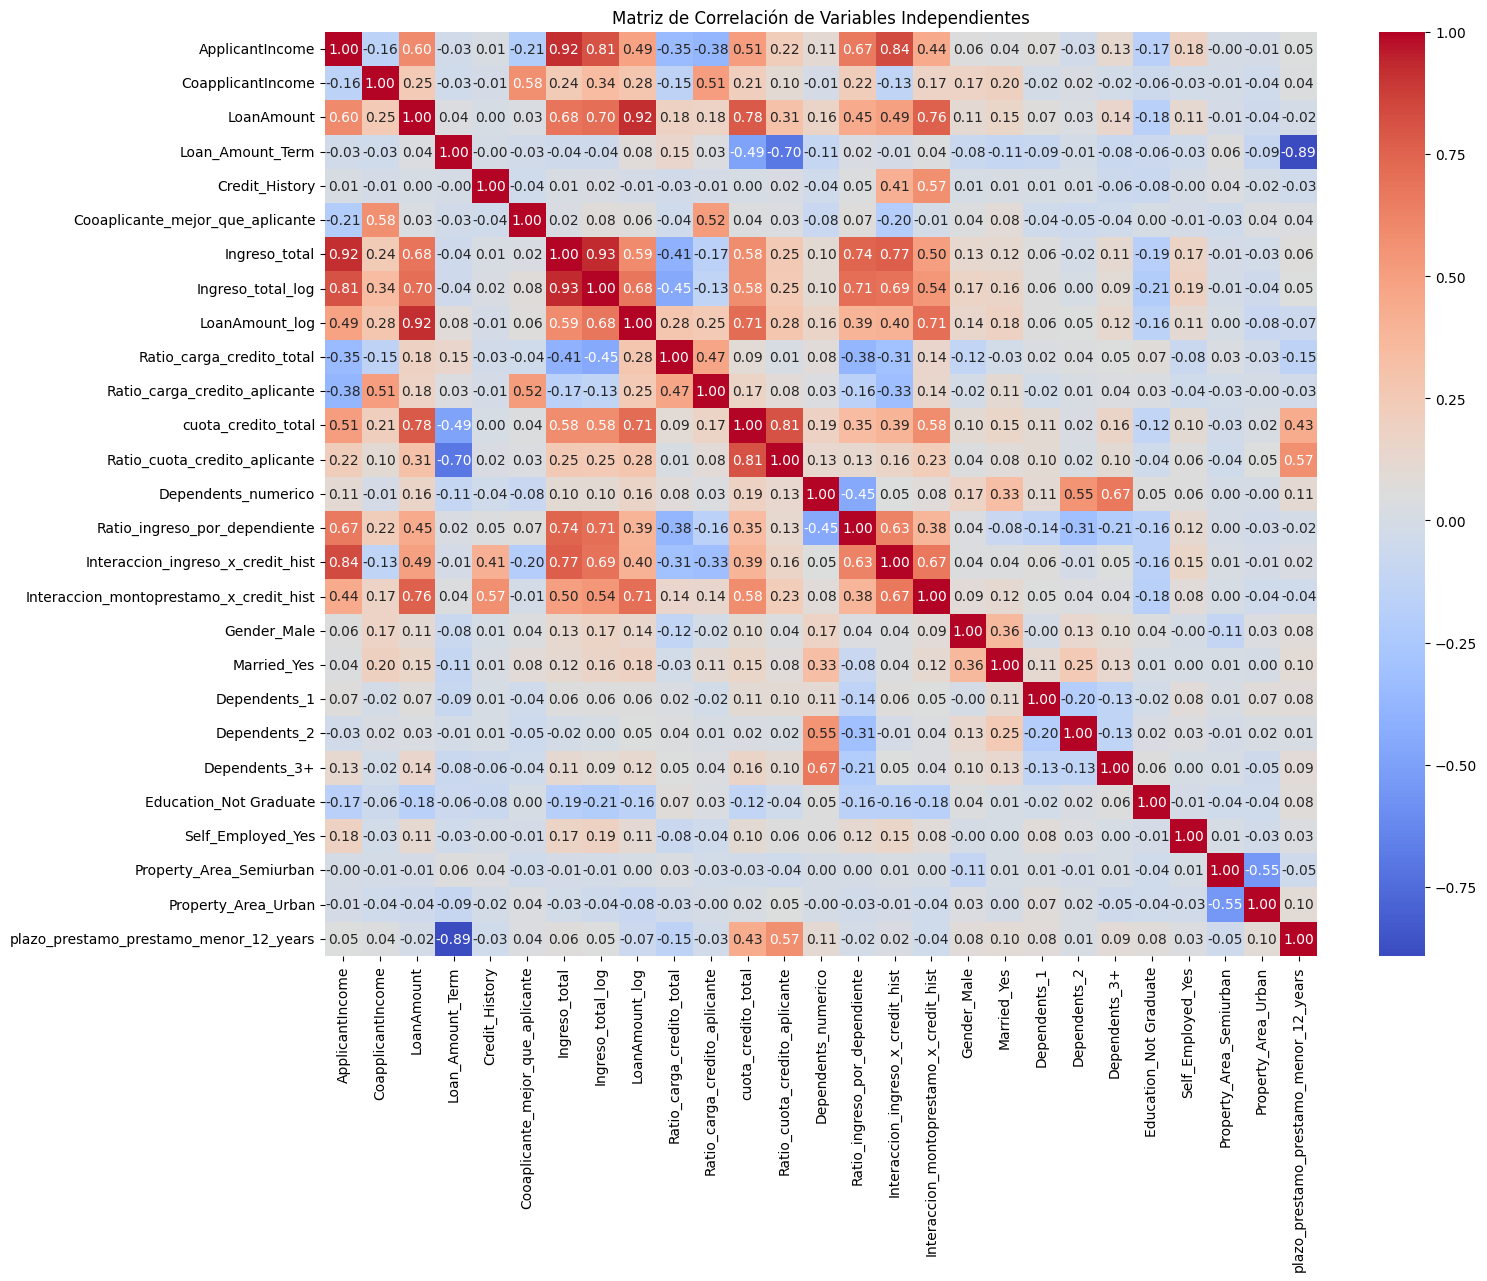

In [ ]:

### Análisis con matriz de correlaciones
plt.figure(figsize=(16,12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Independientes')
plt.show()


Comentario: Respecto a los niveles altos de correlación a primera vista no deberían presentar un problema grande, pues no son variables que traten explicar lo mismo. Por ejemplo, la variable Loan_Amount e Ingreso_total son correlacionados al 0.6, pero tiene sentido pues un mayor monto suele ser necesario para personas con mayores ingresos.

In [ ]:
# ANÁLISIS VIF


# Add a constant to the model (intercept)
X = add_constant(X_train_balanced)

# Calculate VIF for each feature
datacamp_vif_data = pd.DataFrame()
datacamp_vif_data['Feature'] = X_train_balanced.columns
datacamp_vif_data['VIF'] = [variance_inflation_factor(X_train_balanced.values, i) for i in range(X_train_balanced.shape[1])]
###print(datacamp_vif_data)
data_camp_vif_data = datacamp_vif_data.sort_values(by='VIF', ascending=False)
data_camp_vif_data

,Feature,VIF
3,Ingreso_total_log,11.996761
0,LoanAmount,6.312327
9,Gender_Male,6.132310
1,Credit_History,5.460036
4,Ratio_carga_credito_total,4.824537
7,Ratio_ingreso_por_dependiente,4.749583
10,Married_Yes,3.784436
8,Interaccion_ingreso_x_credit_hist,3.500609
5,Ratio_carga_credito_aplicante,2.227489
12,Dependents_2,2.226649


In [ ]:
### ANÁLISIS MEDIANTE EL INDICE DE INFLACIÓN

vif = pd.DataFrame()
vif["Variable"] = X_train_balanced.columns
vif["VIF"] = [variance_inflation_factor(X_train_balanced.values, i)
               for i in range(len(X_train_balanced.columns))]

vif.sort_values("VIF", ascending=False)


,Variable,VIF
3,Ingreso_total_log,11.996761
0,LoanAmount,6.312327
9,Gender_Male,6.132310
1,Credit_History,5.460036
4,Ratio_carga_credito_total,4.824537
7,Ratio_ingreso_por_dependiente,4.749583
10,Married_Yes,3.784436
8,Interaccion_ingreso_x_credit_hist,3.500609
5,Ratio_carga_credito_aplicante,2.227489
12,Dependents_2,2.226649


In [ ]:
### Método RFE, con modelo de clasificación Random Forest
def Top_FeaturesRFE(rfe_fit, columns_evaluated):
  pos = np.arange(len(columns_evaluated)) + 0.5
  plt.barh(pos, rfe_fit.ranking_, align='center')
  plt.title("Feature Importance")
  plt.xlabel("Número de Modelos")
  plt.ylabel("Features")
  plt.axvline(1, color='red', linestyle='--', lw=3)
  plt.yticks(pos, (columns_evaluated))
  plt.grid(True)
  features_selected = columns_evaluated[rfe_fit.support_]
  return features_selected

In [ ]:
# feature extraction con clasificador de random forest
model = RandomForestClassifier(max_depth= 4, n_estimators= 20 )
rfe = RFE(model,step=1, n_features_to_select=5)
rfe_rfc = rfe.fit(X_train_balanced, y_train_balanced)


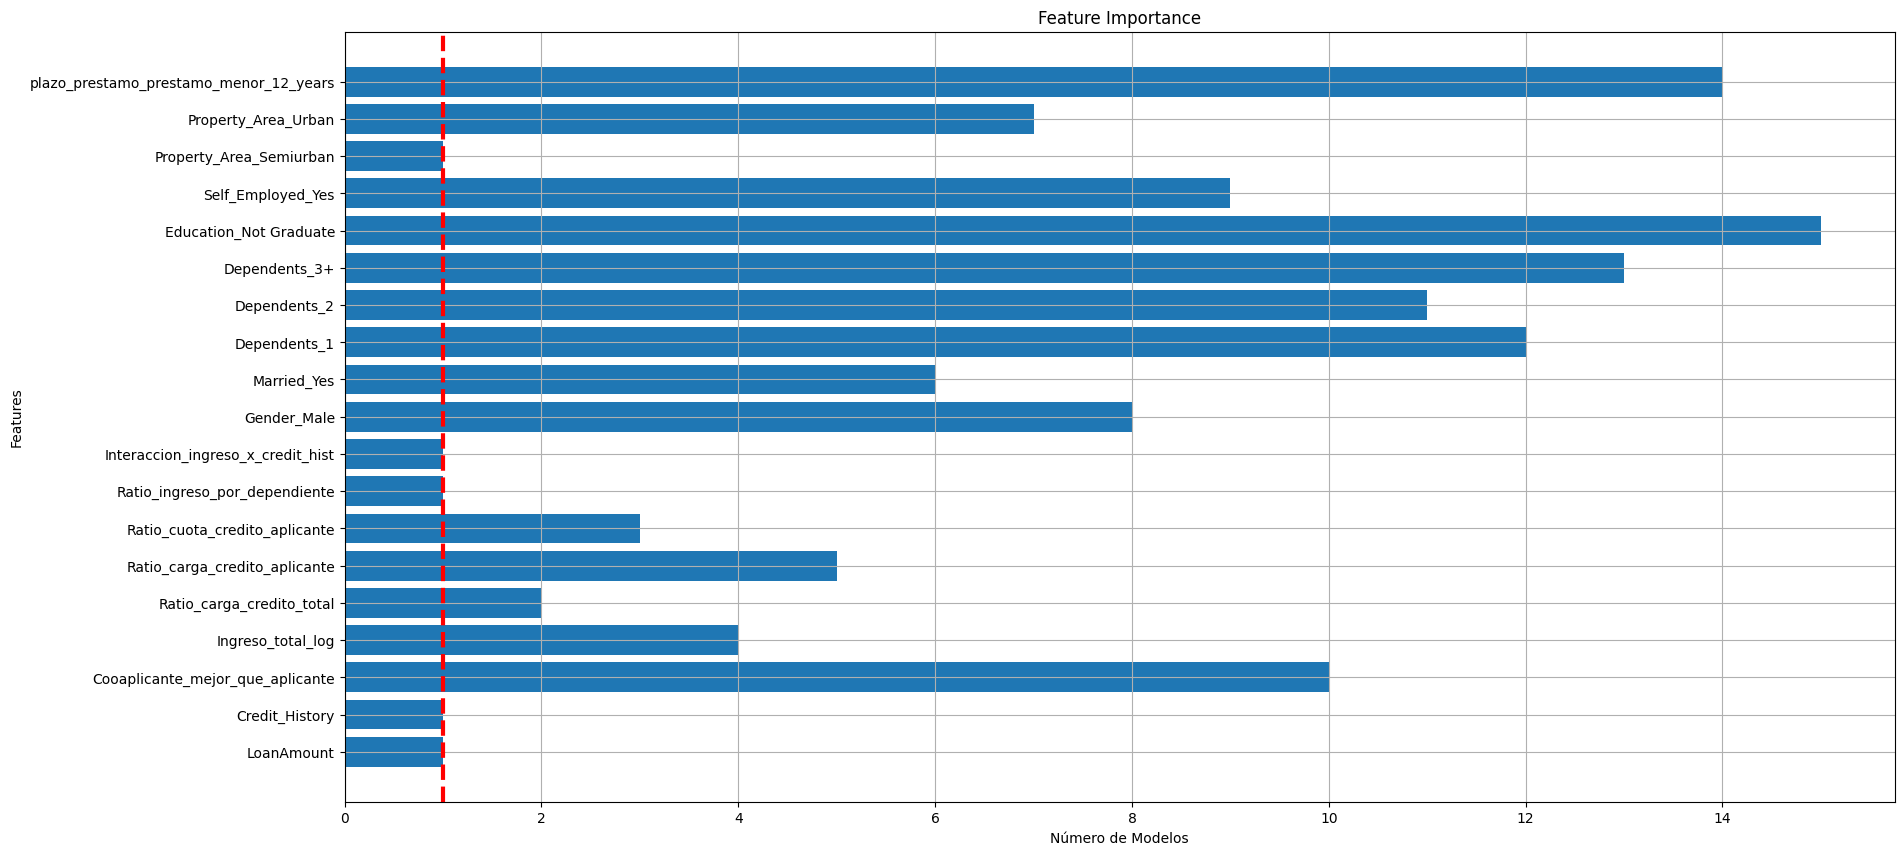

In [ ]:
feature_selected_rfe_randomforest = Top_FeaturesRFE(rfe_fit= rfe_rfc, columns_evaluated = X_train_balanced.columns)

In [ ]:
feature_selected_rfe_randomforest

Index(['LoanAmount', 'Credit_History', 'Ratio_ingreso_por_dependiente',
       'Interaccion_ingreso_x_credit_hist', 'Property_Area_Semiurban'],
      dtype='object')

In [ ]:
# feature extraction con clasificador de decision tree
model = DecisionTreeClassifier(max_depth= 4 )
rfe = RFE(model,step=1, n_features_to_select=5)
rfe_dt = rfe.fit(X_train_balanced, y_train_balanced)

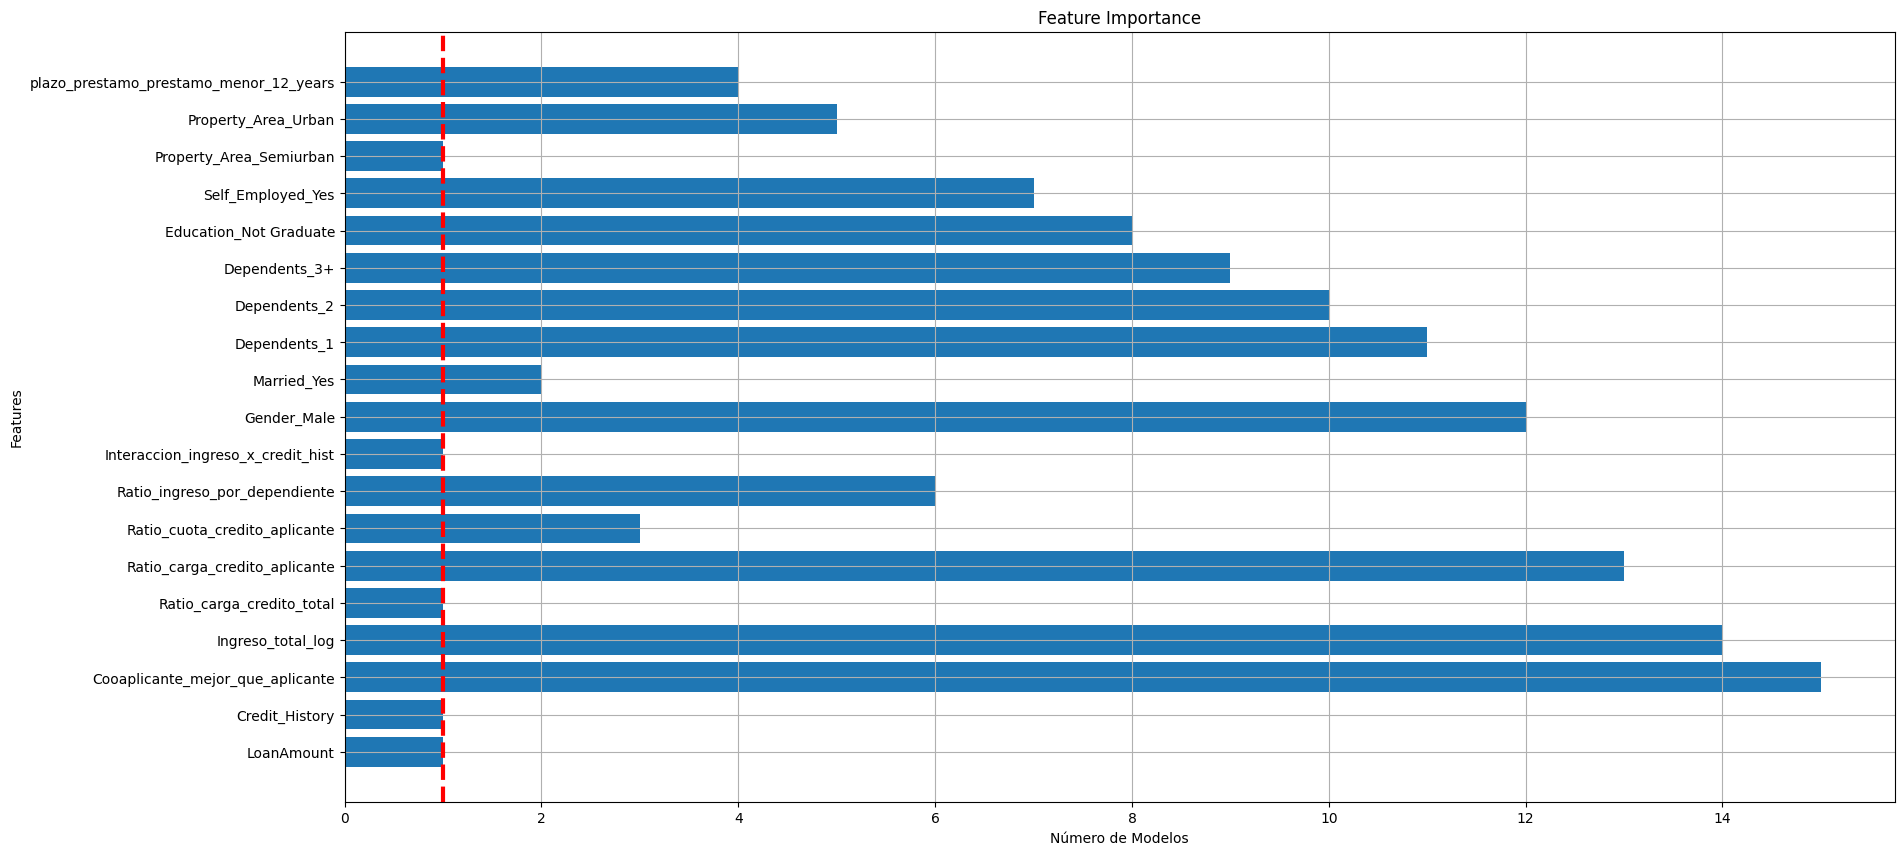

In [ ]:
feature_selected_rfe_decisiontree = Top_FeaturesRFE(rfe_fit= rfe_dt, columns_evaluated = X_train_balanced.columns)

Mediante el método RFE de ambos modelos podemos observar que variables como LoanAmount, Credit_History, Ingres_total, ratio_cuota_credito_aplicante y property_area son variables que ambos casos suelen tener mayor relevancia, variables como dependents si varian mucho tal vez regresemos al inicio para realizarl alguna modificación.

In [ ]:
feature_selected_rfe_decisiontree

Index(['LoanAmount', 'Credit_History', 'Ratio_carga_credito_total',
       'Interaccion_ingreso_x_credit_hist', 'Property_Area_Semiurban'],
      dtype='object')

In [ ]:
### Clustering Jerárquico
def clustering_hierarchy_corr_matrix(dataframe):
  corr = dataframe.corr(method = "pearson").values
  pdist = spc.distance.pdist(corr)
  linkage = spc.linkage(pdist, method='complete')
  idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

  df_clust = pd.DataFrame(list(zip(dataframe.columns, idx)) ,columns=["variables","cluster"])
  df_clust.sort_values(by="cluster",ascending=True,inplace=True)
  return df_clust

In [ ]:
clustering_hierarchy_corr_matrix(dataframe=X_train_balanced)

,variables,cluster
0,LoanAmount,1
3,Ingreso_total_log,1
7,Ratio_ingreso_por_dependiente,1
8,Interaccion_ingreso_x_credit_hist,1
6,Ratio_cuota_credito_aplicante,2
18,plazo_prestamo_prestamo_menor_12_years,2
2,Cooaplicante_mejor_que_aplicante,3
17,Property_Area_Urban,4
12,Dependents_2,5
10,Married_Yes,5


In [ ]:
### Clustering PCA

var_clus_model = VarClusHi(X_train_balanced, maxeigval2 = .7, maxclus=None)
var_clus_model.varclus()

In [ ]:
var_clus_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,LoanAmount,0.586004,0.045158,0.433576
1,0,Ingreso_total_log,0.858216,0.227145,0.183454
2,0,Ratio_ingreso_por_dependiente,0.692364,0.162557,0.367352
3,0,Interaccion_ingreso_x_credit_hist,0.644446,0.240798,0.468326
4,1,Ratio_cuota_credito_aplicante,0.788677,0.063168,0.225572
5,1,plazo_prestamo_prestamo_menor_12_years,0.788677,0.017983,0.215193
6,2,Gender_Male,0.687272,0.019063,0.318806
7,2,Married_Yes,0.687272,0.072821,0.337290
8,3,Property_Area_Semiurban,0.712439,0.020849,0.293684
9,3,Property_Area_Urban,0.712439,0.015061,0.291958


# 5. Entrenamiento de modelos.

In [ ]:
#Aplicamos sobre las variables que ya escogimos previamente

feature_selected_model = X_train_balanced.columns
feature_selected_model

Index(['LoanAmount', 'Credit_History', 'Cooaplicante_mejor_que_aplicante',
       'Ingreso_total_log', 'Ratio_carga_credito_total',
       'Ratio_carga_credito_aplicante', 'Ratio_cuota_credito_aplicante',
       'Ratio_ingreso_por_dependiente', 'Interaccion_ingreso_x_credit_hist',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'plazo_prestamo_prestamo_menor_12_years'],
      dtype='object')

In [ ]:
###  Bloque para automatizar el proceso de gráfico de la curva ROC
def plot_roc_curve(true_y, y_prob,auc_roc,model_name):
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, label= ( "auc "+ model_name + ": %5.3f" % auc_roc ) )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [ ]:
# Bloque para la Evaluación de métricas
def eval_metrics(y_test,y_pred, y_prob):

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    score_f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return (accuracy, auc, score_f1, precision, recall)

In [ ]:
#Parametros del modelo de lgbm
params_lgbm = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'n_estimators':100,
    'num_leaves': 10,
    'learnnig_rage': 0.05
}


In [ ]:
#Modelos a considerar para la evaluacion
models = []

models.append(("GradientBoosting",GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=3, subsample=0.8, random_state=60)))

models.append(("AdaBoost",AdaBoostClassifier(n_estimators=100, random_state=0)))



models.append(("XGBoost", XGBClassifier( colsample_bytree=0.7, learning_rate=0.05, max_depth=6, reg_alpha=1, reg_lambda=1,
                                        n_estimators=500 , subsample= 0.8, objective= 'binary:logistic')))



models.append(("LGBM", None))





models.append(("DecisionTree", DecisionTreeClassifier(max_depth = 6, min_samples_split = 10, min_samples_leaf = 5, random_state = 60)))



models.append(("RandomForest",RandomForestClassifier(max_depth= 12,min_samples_split=4, min_samples_leaf=2,bootstrap=True, max_features='sqrt', n_estimators= 400 )))



models.append(("LogisticRegression", LogisticRegression(max_iter=1000)))

models.append(("Logistic_L1", LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')))

models.append(("KNN", KNeighborsClassifier(n_neighbors=7, weights= 'distance', metric='minkowski', p =2)))




models.append(("SVM_RBF", SVC(kernel='rbf', probability=True, C=2, gamma ='scale')))




models.append(("Bagging", BaggingClassifier()))
models.append(("ExtraTrees", ExtraTreesClassifier(n_estimators = 400, max_depth = None, max_features= "sqrt", min_samples_split=2, random_state = 60)))
models.append(("NaiveBayes", GaussianNB()))
models.append(("MLP", MLPClassifier(hidden_layer_sizes=(64, 32), activation = 'relu', solver = 'adam', learning_rate = 'adaptive',
                                    alpha = 0.0005, max_iter = 800, random_state = 60)))



[LightGBM] [Warning] Unknown parameter: learnnig_rage
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: learnnig_rage
[LightGBM] [Info] Number of positive: 337, number of negative: 337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1592
[LightGBM] [Info] Number of data points in the train set: 674, number of used features: 19
[LightGBM] [Warning] Unknown parameter: learnnig_rage
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


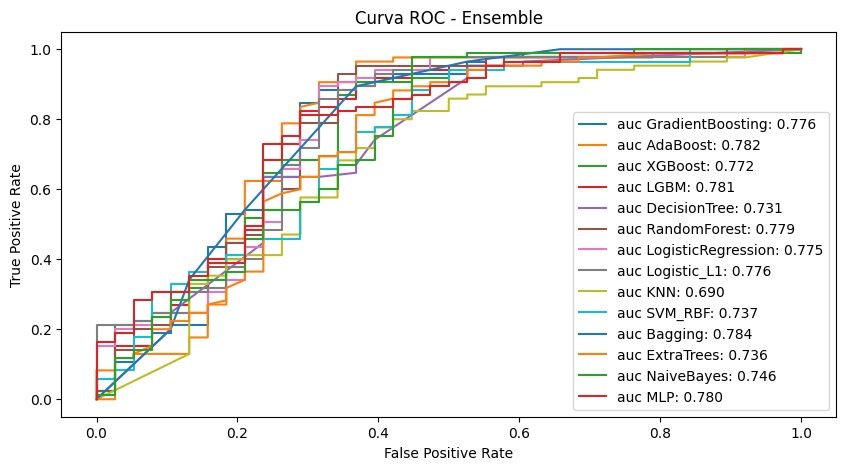

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

df_resultados = pd.DataFrame(columns=['Modelo','AUC', 'Accuracy','Score F1', 'Precision', 'Recall'])
threshold = 0.65

#definimos las muestras a ser considerada en el entrenamiento y prueba
_X_train = X_train_balanced[feature_selected_model]
_y_train = y_train_balanced

_X_test = X_test_scaled[feature_selected_model]
_y_test = y_test

for name,model in models:

    if (name != "LGBM"):
      model_ = model.fit(_X_train, _y_train)
      #Evaluacion del modelo con los datos test
      y_pred = (model_.predict_proba(_X_test)[:,1] >= threshold ).astype(int)
      y_prob = model_.predict_proba(_X_test)[:, 1] #probability
    else:
      lgb_train = lgb.Dataset(_X_train, _y_train)
      lgb_eval = lgb.Dataset(_X_test, _y_test, reference=lgb_train)

      model_ = lgb.train(params_lgbm,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
      #Evaluacion del modelo con los datos test
      y_pred = (model_.predict(_X_test)>= threshold ).astype(int)
      y_prob = model_.predict(_X_test) #probability


    #calculo de metricas de desempeño
    (accuracy, auc, score_f1, precision, recall) = eval_metrics(_y_test,y_pred,y_prob)

    #Guardamos los resultados para luego mostrarlos en el dataframe df_resultados
    dict_test = {'Modelo': [name], 'AUC': [auc], 'Accuracy': [accuracy], 'Score F1': [score_f1], 'Precision': [precision], 'Recall': [recall]}
    df_res_test = pd.DataFrame(dict_test)
    df_resultados = pd.concat([df_resultados, df_res_test], ignore_index = True)

    #Graficamos las curvas ROC para cada modelo
    plot_roc_curve(_y_test, y_prob,auc, name)

#Ploteamos la curva ROC
plt.legend()
plt.title("Curva ROC - Ensemble")

plt.show()

In [ ]:
df_resultados.sort_values(by='Accuracy', ascending=False)

,Modelo,AUC,Accuracy,Score F1,Precision,Recall
13,MLP,0.779567,0.780488,0.836364,0.862500,0.811765
3,LGBM,0.781115,0.699187,0.754967,0.863636,0.670588
11,ExtraTrees,0.735604,0.691057,0.756410,0.830986,0.694118
10,Bagging,0.783901,0.682927,0.741722,0.848485,0.658824
2,XGBoost,0.772136,0.682927,0.748387,0.828571,0.682353
4,DecisionTree,0.730805,0.674797,0.729730,0.857143,0.635294
0,GradientBoosting,0.775851,0.674797,0.729730,0.857143,0.635294
12,NaiveBayes,0.745511,0.666667,0.742138,0.797297,0.694118
8,KNN,0.690248,0.617886,0.675862,0.816667,0.576471
5,RandomForest,0.778947,0.609756,0.661972,0.824561,0.552941


In [ ]:
df_resultados.sort_values(by='AUC', ascending=False)

,Modelo,AUC,Accuracy,Score F1,Precision,Recall
10,Bagging,0.783901,0.682927,0.741722,0.848485,0.658824
1,AdaBoost,0.781579,0.308943,0.000000,0.000000,0.000000
3,LGBM,0.781115,0.699187,0.754967,0.863636,0.670588
13,MLP,0.779567,0.780488,0.836364,0.862500,0.811765
5,RandomForest,0.778947,0.609756,0.661972,0.824561,0.552941
7,Logistic_L1,0.776471,0.569106,0.613139,0.807692,0.494118
0,GradientBoosting,0.775851,0.674797,0.729730,0.857143,0.635294
6,LogisticRegression,0.774613,0.585366,0.627737,0.826923,0.505882
2,XGBoost,0.772136,0.682927,0.748387,0.828571,0.682353
12,NaiveBayes,0.745511,0.666667,0.742138,0.797297,0.694118


# 8. VALIDACIÓN CRUZADA

In [ ]:
### Modelos candidatos para la validación cruzada
k_folds = KFold(n_splits = 10, random_state = 60, shuffle=True)

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation = 'relu', solver = 'adam', learning_rate = 'adaptive',
                                    alpha = 0.0005, max_iter = 800, random_state = 60)

scores_mlp = cross_val_score(mlp, _X_train, _y_train, cv = k_folds, scoring='roc_auc', n_jobs = -1)
scores_accuracy_mlp = cross_val_score(mlp, _X_train, _y_train, cv = k_folds, scoring='accuracy', n_jobs = -1)

print("---"*30)
print(f'Accuracy MLP :{scores_accuracy_mlp}')
print(f'AUC MLp: {scores_mlp}')
print("---"*30)


------------------------------------------------------------------------------------------
Accuracy MLP :[0.80882353 0.77941176 0.80882353 0.76470588 0.80597015 0.73134328
 0.80597015 0.80597015 0.82089552 0.79104478]
AUC MLp: [0.87232143 0.84122807 0.85701831 0.84910714 0.81729055 0.83212341
 0.87685185 0.88378378 0.91470054 0.85571688]
------------------------------------------------------------------------------------------


In [ ]:
# xgb
xgb = XGBClassifier( colsample_bytree=0.7, learning_rate=0.05, max_depth=6, reg_alpha=1, reg_lambda=1,
                                        n_estimators=500 , subsample= 0.8, objective= 'binary:logistic',  threshold=0.1)
###xgb= XGBClassifier( random_state=60, num_estimators=20)

k_folds = KFold(n_splits = 10, random_state = 60, shuffle=True)
scores_xgb = cross_val_score(xgb, _X_train, _y_train, cv = k_folds, scoring='roc_auc', n_jobs = -1)
scores_accuracy_xgb = cross_val_score(xgb, _X_train, _y_train, cv = k_folds, scoring='accuracy', n_jobs = -1)

print(f'Accuracy XGB :{scores_accuracy_xgb}')
print(f'AUC XGB: {scores_xgb}')


Accuracy XGB :[0.80882353 0.77941176 0.76470588 0.76470588 0.7761194  0.79104478
 0.80597015 0.8358209  0.79104478 0.82089552]
AUC XGB: [0.87678571 0.89912281 0.85178727 0.86339286 0.85294118 0.9092559
 0.87777778 0.89189189 0.91833031 0.8892922 ]


In [ ]:
#LGBM
lgbm_classifier = lgb.LGBMClassifier(**params_lgbm, random_state=60, threshold=0.65)

scores_LGBM = cross_val_score(lgbm_classifier , _X_train, _y_train, cv = k_folds, scoring='roc_auc', n_jobs = -1)
scores_accuracy_LGBM = cross_val_score(lgbm_classifier, _X_train, _y_train, cv = k_folds, scoring='accuracy', n_jobs = -1)

print("---"*30)
print(f'Accuracy LGBM :{scores_accuracy_LGBM}')
print(f'AUC LGBM: {scores_LGBM}')
print("---"*30)


------------------------------------------------------------------------------------------
Accuracy LGBM :[0.77941176 0.76470588 0.72058824 0.73529412 0.76119403 0.8358209
 0.7761194  0.82089552 0.79104478 0.80597015]
AUC LGBM: [0.87857143 0.87807018 0.82127289 0.85714286 0.85026738 0.89473684
 0.86203704 0.89189189 0.91560799 0.86479129]
------------------------------------------------------------------------------------------


In [ ]:

print(f'Accuracy XGB :{scores_accuracy_xgb}')
print(f'AUC XGB: {scores_xgb}')
print("---"*30)
print(f'Accuracy MLP :{scores_accuracy_mlp}')
print(f'AUC MLp: {scores_mlp}')
print("---"*30)
print(f'Accuracy LGBM :{scores_accuracy_LGBM}')
print(f'AUC LGBM: {scores_LGBM}')
print("---"*30)


Accuracy XGB :[0.80882353 0.77941176 0.76470588 0.76470588 0.7761194  0.79104478
 0.80597015 0.8358209  0.79104478 0.82089552]
AUC XGB: [0.87678571 0.89912281 0.85178727 0.86339286 0.85294118 0.9092559
 0.87777778 0.89189189 0.91833031 0.8892922 ]
------------------------------------------------------------------------------------------
Accuracy MLP :[0.80882353 0.77941176 0.80882353 0.76470588 0.80597015 0.73134328
 0.80597015 0.80597015 0.82089552 0.79104478]
AUC MLp: [0.87232143 0.84122807 0.85701831 0.84910714 0.81729055 0.83212341
 0.87685185 0.88378378 0.91470054 0.85571688]
------------------------------------------------------------------------------------------
Accuracy LGBM :[0.77941176 0.76470588 0.72058824 0.73529412 0.76119403 0.8358209
 0.7761194  0.82089552 0.79104478 0.80597015]
AUC LGBM: [0.87857143 0.87807018 0.82127289 0.85714286 0.85026738 0.89473684
 0.86203704 0.89189189 0.91560799 0.86479129]
-----------------------------------------------------------------------

In [ ]:
print("XGBoost Cross-Validation Resumen ")
print(f'Mean Accuracy: {scores_accuracy_xgb.mean():.4f}')
print(f'Std Deviation Accuracy: {scores_accuracy_xgb.std():.4f}')
print(f'Mean AUC: {scores_xgb.mean():.4f}')
print(f'Std Deviation AUC: {scores_xgb.std():.4f}')
print("---"*15)

print("MLP Cross-Validation Resumen")
print(f'Mean Accuracy: {scores_accuracy_mlp.mean():.4f}')
print(f'Std Deviation Accuracy: {scores_accuracy_mlp.std():.4f}')
print(f'Mean AUC: {scores_mlp.mean():.4f}')
print(f'Std Deviation AUC: {scores_mlp.std():.4f}')
print("---"*15)

print("LGBM Cross-Validation Resumen")
print(f'Mean Accuracy: {scores_accuracy_LGBM.mean():.4f}')
print(f'Std Deviation Accuracy: {scores_accuracy_LGBM.std():.4f}')
print(f'Mean AUC: {scores_LGBM.mean():.4f}')
print(f'Std Deviation AUC: {scores_LGBM.std():.4f}')
print("---"*15)

XGBoost Cross-Validation Resumen 
Mean Accuracy: 0.7939
Std Deviation Accuracy: 0.0226
Mean AUC: 0.8831
Std Deviation AUC: 0.0216
---------------------------------------------
MLP Cross-Validation Resumen
Mean Accuracy: 0.7923
Std Deviation Accuracy: 0.0256
Mean AUC: 0.8600
Std Deviation AUC: 0.0266
---------------------------------------------
LGBM Cross-Validation Resumen
Mean Accuracy: 0.7791
Std Deviation Accuracy: 0.0342
Mean AUC: 0.8714
Std Deviation AUC: 0.0251
---------------------------------------------


In [ ]:
feature_selected_model

Index(['LoanAmount', 'Credit_History', 'Cooaplicante_mejor_que_aplicante',
       'Ingreso_total_log', 'Ratio_carga_credito_total',
       'Ratio_carga_credito_aplicante', 'Ratio_cuota_credito_aplicante',
       'Ratio_ingreso_por_dependiente', 'Interaccion_ingreso_x_credit_hist',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'plazo_prestamo_prestamo_menor_12_years'],
      dtype='object')

# 8.Tunning Hiperparametros - Método de Optimización Bayesiana

Optimización para el modelo LGBM

In [ ]:
### Grid de LGBM

num_leaves_list       = [20, 40, 60, 100, 150, 200]
max_depth_list        = [3, 4, 5, 6, 8, 10]
learning_rate_list    = [0.005, 0.01, 0.02, 0.05, 0.1]
n_estimators_list     = [50, 100, 150, 200, 300]
feature_fraction_list = [0.6, 0.7, 0.8, 0.9, 1.0]
bagging_fraction_list = [0.6, 0.7, 0.8, 0.9, 1.0]


param_grid_lgbm = {
    'num_leaves'       : num_leaves_list,
    'max_depth'        : max_depth_list,
    'learning_rate'    : learning_rate_list,
    'n_estimators'     : n_estimators_list,
    'feature_fraction' : feature_fraction_list,
    'bagging_fraction' : bagging_fraction_list
}

In [ ]:
### Optimización para el LGBM
opt_lgbm = BayesSearchCV(
    estimator=lgb.LGBMClassifier(random_state=60),
    search_spaces=param_grid_lgbm,
    n_iter=30,
    cv=10,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

In [ ]:
opt_lgbm.fit(_X_train, _y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Number of positive: 337, number of negative: 337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1592
[LightGBM] [Info] Number of data points in the train set: 674, number of used features: 19
[LightGBM] [Info] [b

BayesSearchCV(cv=10, estimator=LGBMClassifier(random_state=60), n_iter=30,
              n_jobs=-1, random_state=42, scoring='accuracy',
              search_spaces={'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
                             'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
                             'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1],
                             'max_depth': [3, 4, 5, 6, 8, 10],
                             'n_estimators': [50, 100, 150, 200, 300],
                             'num_leaves': [20, 40, 60, 100, 150, 200]})

In [ ]:
print("MEJORES PARÁMETROS PARA LGBM:", opt_lgbm.best_params_)
print("MEJOR ESTIMADOR PARA LGBM:", opt_lgbm.best_estimator_)

MEJORES PARÁMETROS PARA LGBM: OrderedDict({'bagging_fraction': 0.6, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 100})
MEJOR ESTIMADOR PARA LGBM: LGBMClassifier(bagging_fraction=0.6, feature_fraction=0.9, max_depth=5,
               n_estimators=200, num_leaves=100, random_state=60)


In [ ]:
model_lgbm = opt_lgbm.best_estimator_

y_prob = model_lgbm.predict_proba(_X_test)[:,1]
y_pred = (y_prob >= 0.65).astype(int)

accuracy, auc, f1, precision, recall = eval_metrics(_y_test, y_pred, y_prob)
print(accuracy, auc, f1, precision, recall)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
0.7154471544715447 0.7647058823529411 0.7770700636942676 0.8472222222222222 0.7176470588235294


OPTIMIZACIÓN EN EL MODELO MLP

In [ ]:
from skopt.space import Categorical

### Lista de hiperparametros para MLP
### No se puedo aplicar el hiden
activation_list        = ['relu', 'tanh']
alpha_list             = [0.0001, 0.0005, 0.001, 0.005]   # L2 regularization
learning_rates_init    = [0.0005, 0.001, 0.005, 0.01]
solver_list            = ['adam']  # recomendado



param_grid_mlp = {
    'activation'         : Categorical(activation_list),
    'alpha'              : Categorical(alpha_list),
    'learning_rate_init' : Categorical(learning_rates_init),
    'solver'             : Categorical(solver_list)
}

In [ ]:
opt_mlp = BayesSearchCV(
    estimator=MLPClassifier(max_iter=400, random_state=60), # hidden_layer_sizes will use default or needs to be set manually
    search_spaces=param_grid_mlp,
    n_iter=20,
    cv=10,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

opt_mlp.fit(_X_train, _y_train)

BayesSearchCV(cv=10, estimator=MLPClassifier(max_iter=400, random_state=60),
              n_iter=20, n_jobs=-1, random_state=42, scoring='accuracy',
              search_spaces={'activation': Categorical(categories=('relu', 'tanh'), prior=None),
                             'alpha': Categorical(categories=(0.0001, 0.0005, 0.001, 0.005), prior=None),
                             'learning_rate_init': Categorical(categories=(0.0005, 0.001, 0.005, 0.01), prior=None),
                             'solver': Categorical(categories=('adam',), prior=None)})

In [ ]:
models.append(("MLP", MLPClassifier(hidden_layer_sizes=(64, 32), activation = 'relu', solver = 'adam', learning_rate = 'adaptive',
                                    alpha = 0.0005, max_iter = 800, random_state = 60)))

In [ ]:
print("MEJORES PARÁMETROS MLP:", opt_mlp.best_params_)
print("MEJOR ESTIMADOR MLP:", opt_mlp.best_estimator_)

MEJORES PARÁMETROS MLP: OrderedDict({'activation': 'relu', 'alpha': 0.005, 'learning_rate_init': 0.001, 'solver': 'adam'})
MEJOR ESTIMADOR MLP: MLPClassifier(alpha=0.005, max_iter=400, random_state=60)


In [ ]:
model_mlp = opt_mlp.best_estimator_
y_pred = (model_mlp.predict_proba(_X_test)[:,1] >= threshold ).astype(int)
y_prob = model_mlp.predict_proba(_X_test)[:, 1]
(accuracy, auc, score_f1, precision, recall) = eval_metrics(_y_test,y_pred,y_prob) #calculo de metricas de desempeño
print(accuracy, auc, f1, precision, recall)

0.7073170731707317 0.7309597523219815 0.7770700636942676 0.855072463768116 0.6941176470588235


In [ ]:
opt_mlp.best_params_

OrderedDict([('activation', 'relu'),
             ('alpha', 0.005),
             ('learning_rate_init', 0.001),
             ('solver', 'adam')])

Como no se puedo aplicar el hidden_layer directamente en el modelo optimizado se aplica manualmente ahora con los otros  hiperparametro tuneados - El modelo final es **model_mlp_opt**

In [ ]:
model_mlp_1 = MLPClassifier(hidden_layer_sizes=(64,), activation = 'relu', solver = 'adam', learning_rate = 'adaptive',
                                    alpha = 0.005, max_iter = 800, random_state = 60).fit(_X_train, _y_train)

      #Evaluacion del modelo con los datos test
y_pred = (model_mlp_1.predict_proba(_X_test)[:,1] >= threshold ).astype(int)
y_prob = model_mlp_1.predict_proba(_X_test)[:, 1]
(accuracy, auc, score_f1, precision, recall) = eval_metrics(_y_test,y_pred,y_prob)
print(accuracy, auc, f1, precision, recall)

0.6991869918699187 0.7272445820433436 0.7770700636942676 0.8333333333333334 0.7058823529411765


In [ ]:

model_mlp_opt = MLPClassifier(hidden_layer_sizes=(64, 32), activation = 'relu', solver = 'adam', learning_rate = 'adaptive',
                                    alpha = 0.0005, max_iter = 800, random_state = 60).fit(_X_train, _y_train)

      #Evaluacion del modelo con los datos test
y_pred = (model_mlp_opt.predict_proba(_X_test)[:,1] >= threshold ).astype(int)
y_prob = model_mlp_opt.predict_proba(_X_test)[:, 1]
(accuracy, auc, score_f1, precision, recall) = eval_metrics(_y_test,y_pred,y_prob)
print(accuracy, auc, f1, precision, recall)

0.7804878048780488 0.7795665634674923 0.7770700636942676 0.8625 0.8117647058823529


In [ ]:
model_mlp_3 = MLPClassifier(hidden_layer_sizes=(128, 32), activation = 'relu', solver = 'adam', learning_rate = 'adaptive',
                                    alpha = 0.0005, max_iter = 800, random_state = 60).fit(_X_train, _y_train)

      #Evaluacion del modelo con los datos test
y_pred = (model_mlp_3.predict_proba(_X_test)[:,1] >= threshold ).astype(int)
y_prob = model_mlp_3.predict_proba(_X_test)[:, 1] #probability
(accuracy, auc, score_f1, precision, recall) = eval_metrics(_y_test,y_pred,y_prob)
print(accuracy, auc, f1, precision, recall)

0.7235772357723578 0.7015479876160992 0.7770700636942676 0.8311688311688312 0.7529411764705882


In [ ]:
model_mlp_4 = MLPClassifier(hidden_layer_sizes=(32, 16), activation = 'relu', solver = 'adam', learning_rate = 'adaptive',
                                    alpha = 0.0005, max_iter = 800, random_state = 60).fit(_X_train, _y_train)

      #Evaluacion del modelo con los datos test
y_pred = (model_mlp_4.predict_proba(_X_test)[:,1] >= threshold ).astype(int)
y_prob = model_mlp_4.predict_proba(_X_test)[:, 1]
(accuracy, auc, score_f1, precision, recall) = eval_metrics(_y_test,y_pred,y_prob)
print(accuracy, auc, f1, precision, recall)

0.7073170731707317 0.7876160990712074 0.7770700636942676 0.8356164383561644 0.7176470588235294


#9. Interpretación de Resultados

In [ ]:



# Se toma una muestra representativa para que no sea tan demorado el proceso
X_sample = _X_train

In [ ]:
### Aplicación de Shape Values mediante Kernel al no ser un arbol de decisión
explainer = shap.KernelExplainer(
    lambda X: model_mlp_opt.predict_proba(X)[:, 1],
    X_sample
)


In [ ]:
X_test_sample = _X_test
shap_values = explainer.shap_values(X_test_sample) ### clase 1 = "Aprobado"



  0%|          | 0/123 [00:00<?, ?it/s]

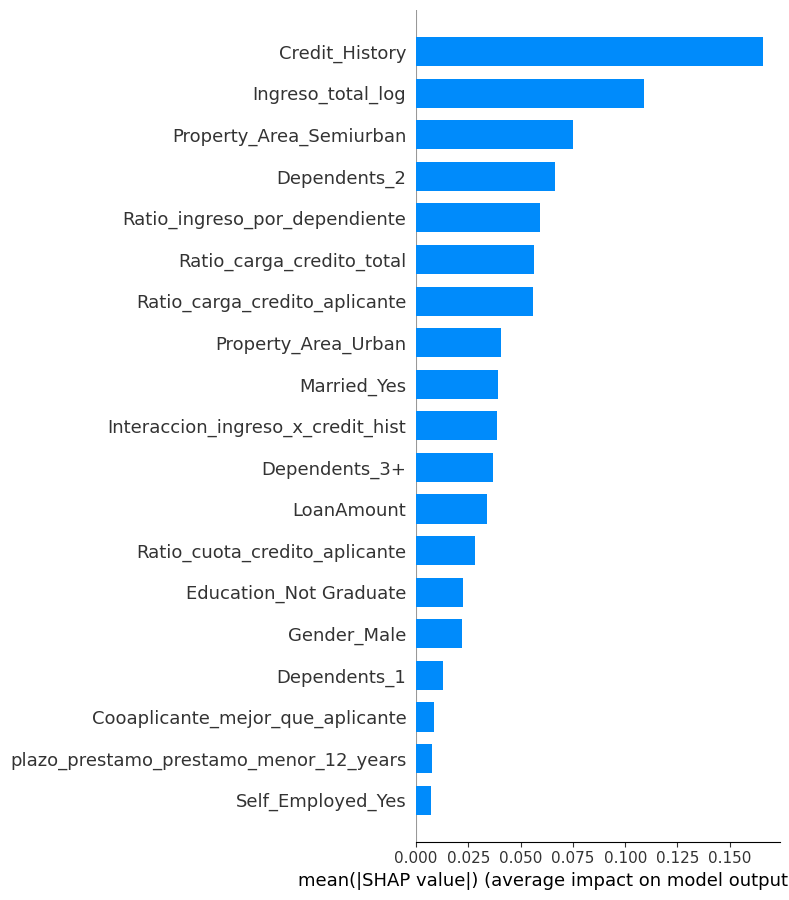

In [ ]:
### Gráfio global bar plot
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")


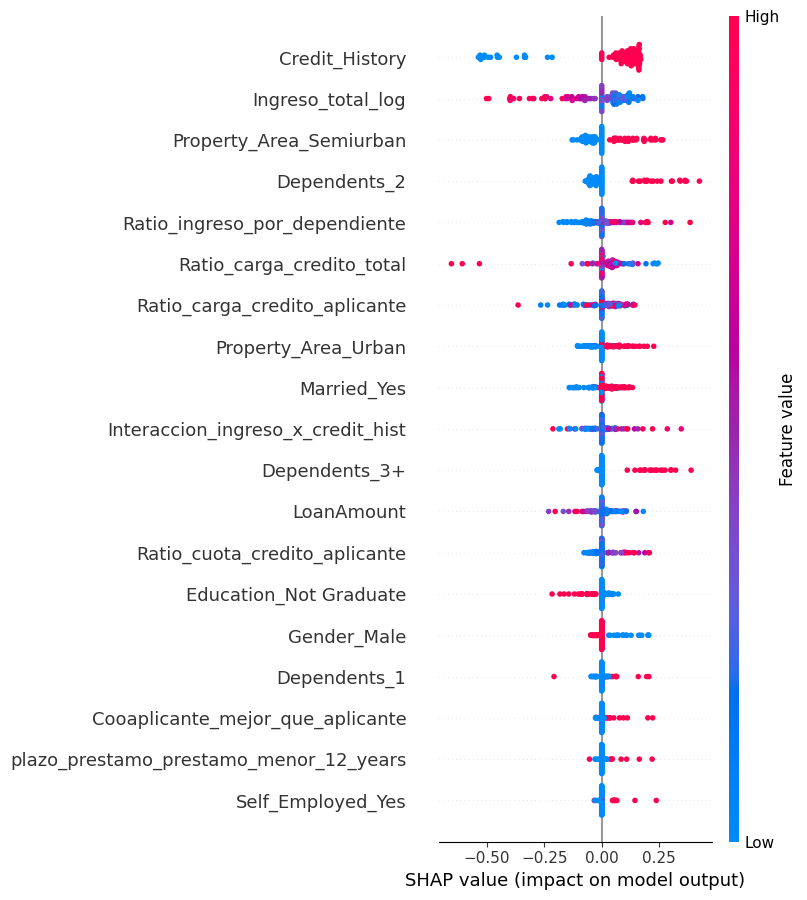

In [ ]:
### Gráfico glopal normal
shap.summary_plot(shap_values, X_test_sample)
